Круглая поверхность, возбужденная синфазно, находится в центре системы координат (рис. 5.17) и имеет радиус $R_0 = 5λ$. Распределение амплитуды возбуждающего поля вдоль радиуса $f(p) = (1 − (1 − ∆)(\frac{p}{R_0})^2)$. Параметр распределения ∆ = 0,316. Рассчитать нормированную амплитудную характеристику направленности возбужденной поверхности в плоскости ZOY в пределах −20°,...,20°и построить её диаграмму в прямоугольной системе координат с линейным и логарифмическим масштабом по оси ординат.

![](../img/Chapter_5_example_3_picture_1.png)

**Решение задачи**
Для расчета нормированной амплитудной характеристики направленности в любой плоскости, проходящей через ось Z, в том числе и в плоскости ZOY, воспользуемся следующей формулой:

$F(θ) = |\frac{(1 + cos(θ)) * 2∆(J_1(kR_0sin(θ)))}{f(θ_{гл})kR_0sin(θ)} + \frac{4(1 - ∆)(J_1(kR_0sin(θ)))}{(kR_0sin(θ))^2}|$ (1)

In [53]:
# Импортируем необходимые библиотеки
import numpy
import matplotlib.pyplot as plt
from scipy.special import j1, jn

In [54]:
R = 5  # радиус в долях длины волны
delta = 0.316  # параметр распределения амплитуды вдоль радиуса
# Задаем угл тета в градусах с параметрами:
# начальное значение - 0.01
# конечное значение - 360
# количество точек - 360
TETA = (numpy.pi/(5*360))*numpy.linspace(1, 360, 360)

In [55]:
def get_unnormalized_hn(teta):
    return numpy.array(
       numpy.abs(((2*delta*j1(R*2*numpy.pi*numpy.sin(teta))*(1+numpy.cos(teta)))/(R*2*numpy.pi*numpy.sin(teta))) +
        ((4*(1-delta)*jn(2, R*2*numpy.pi*numpy.sin(teta))*(1-numpy.cos(teta)))/((R*2*numpy.pi*numpy.sin(teta))**2))
                 ))


# Функция get_max_hn рассчитывает максимальное значение ненормированной характеристики направленности
def get_max_hn(hn):
    return numpy.max(hn)


# Функция get_normalized_hn рассчитывает нормированную характеристику направленности
def get_normalized_hn(teta, maxf):
    f = get_unnormalized_hn(teta)
    return (1/maxf) * f

In [56]:
F = get_unnormalized_hn(TETA)
M = get_max_hn(F)
print('M =', M)

In [57]:
# Задаем угл тета в градусах с параметрами:
# начальное значение - -40
# конечное значение - 40
# количество точек - 360
TETA = (numpy.pi/(180))*numpy.linspace(-20, 20, 360)
F = get_normalized_hn(TETA, M)  # Получаем нормированную диаграмму направленности

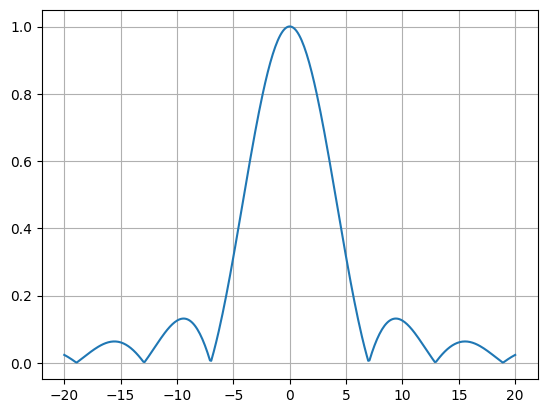

In [58]:
plt.plot(TETA / (numpy.pi/180), F)
plt.grid()
plt.show()

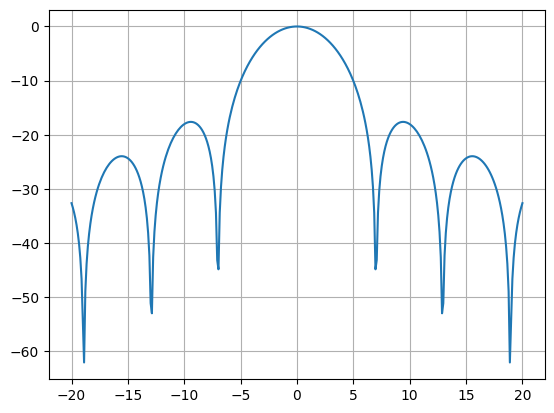

In [59]:
F = 20 * numpy.log10(F)
plt.plot(TETA / (numpy.pi/180), F)
plt.grid()
plt.show()